# Clustering Techniques -- Beyond K-Means

Understanding the similarities and differences in data is a foundational challenge to any business's data strategy. Whether it's identifying customers with shared nuances and idiosyncrasies or determining homogeneous gene sequences for cancer research, several techniques exist for grouping data -- otherwise known as clustering to the data science world or segmentation to the business world.

One of the most commonly used methods by analytics practitioners is K-Means Clustering. Its easy-to-understand process and variety of applications make it a popular technique and probably the first (if not only) clustering method taught to statistics students. Yet for all that K-Means is good for, it isn't a panacea. Like all statistical modeling methods it has its pros, cons, and of course, underlying assumptions. Today we're going to explore alternative clustering techniques to K-Means for situations were its performance can be suboptimal.

## Assumptions of K-Means

For the sake of brevity, I'll assume the reader has an understanding of how K-Means works (for a refresher, go [here](https://en.wikipedia.org/wiki/K-means_clustering)). Some of the underlying assumptions that make K-Means an efficient clustering technique (especially on the very large data sets you'd expect to find in a productionized big data solution) also can be its greatest weaknesses. While there's no doubt that K-Means will cluster any data you feed into it, the resulting clusters may not realistically capture the underlying relationships an analyst seeks to find.

Let's explore three assumptions of K-Means that, if violated, can result in poor or downright inaccurate clusters:

* Clusters are approximately spherical and have similar variance.
* Clusters are approximately the same size (i.e. contain the same number of data points).
* All data points belong to a cluster.

It should be noted that even when these assumptions *are* met, the iterative nature and randomized placement of centroids at algorithm initialization can lead K-Means to cluster data differently with each run if not reach convergence at local optima rather than global. As with any statistical technique, never blindly apply and accept the results!

## Clusters are approximately spherical and have similar variance

Real life data is almost always messy. The examples and illustrations we see in our statistics courses are designed to reflect ideal situations that sadly almost never occur. The first assumption of the K-Means algorithm we'll cover is a good example of this.

First, for K-Means to deliver adequate results clusters must be roughly spherical. If we think about a simple case where our data is 2-dimensional this would mean that data points form round "blobs" when plotted. This amounts to the distributions of each cluster being approximately Gaussian. For example, if one were to plot Age against Net Worth for everyone in the United States you might expect data of this shape -- Net Worth most often increases with Age but there is some variability within each dimension. This segues into the other half of this assumption.

Second, K-Means assumes equal variance withing each cluster meaning each "blob" has about the same density. Again, in real life this rarely happens as some clusters are more tightly packed while others are less so. Variability can also impact the *separability* of the clusters. 

Let's visualize two toy data sets to illustrate:

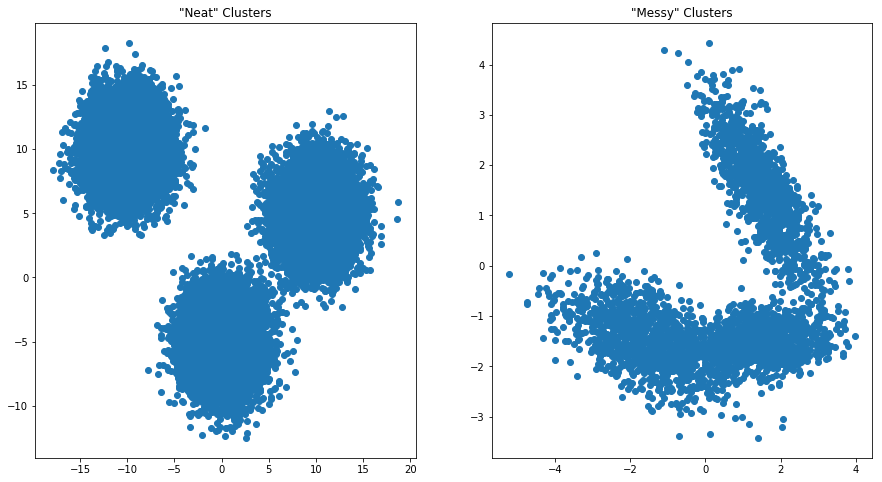

In [134]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, y_neat = datasets.make_blobs(n_samples=35000, 
                                     centers=centers_neat,
                                     cluster_std=2,
                                     random_state=2)

x_messy, y_messy = datasets.make_classification(n_samples=3500,
                                                n_informative=2,
                                                n_classes=3,
                                                n_clusters_per_class=1,
                                                class_sep=1.5,
                                                shuffle=False,
                                                random_state=301)
plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])
plt.savefig('neatmessy')

Our data set on the left seems to clearly exhibit having three well-defined clusters while the set on the right is a little more... nebulous. Is it two clusters? Maybe three? While visualization via a scatter plot allows us to inspect our data for obvious clusters, K-Means does not *see* like we do and will adhere to the algorithm (as well as to the number of clusters we indicate exist *before* running it -- the "K" in "K-Means").

The "Messy" plot violates both the spherical and variability assumptions. The data points in the top half seem to form one or two clusters, are approximately round, and have similar variance but the data points situated near the bottom half appear linear and seem more dense (i.e. lower variance).

Let's see how K-Means would cluster the above two data sets.

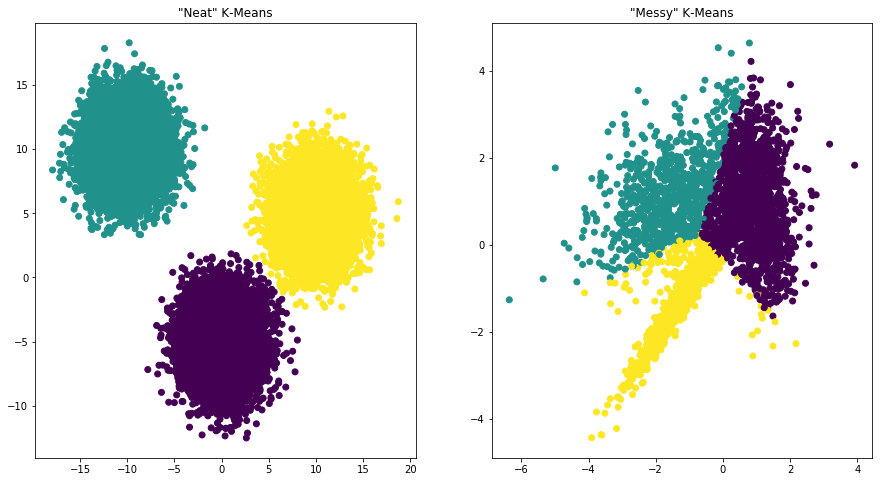

In [106]:
from sklearn.cluster import KMeans

km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat)
plt.subplot(122, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy)

Interesting results to say the least. While the performance on the "Neat" data set achieves excellent clustering, our "Messy" data set leaves something to be desired. As stated before: visually, we can see two, maybe three, clusters but K-Means creates partitions that don't particularly reflect that. Furthermore, K-Means will always find the number of clusters we specify a priori.


